In [1]:
import bacteriopop_utils
import feature_selection_utils
import load_data
import dynamic_mode_decomposition as dmd
import network_construction as net

import seaborn as sns
%matplotlib inline

In [2]:
loaded_data = data = load_data.load_data()

In [3]:
loaded_data.shape

(64755, 11)

In [4]:
loaded_data.head()

,kingdom,phylum,class,order,family,genus,length,oxygen,replicate,week,abundance
sampleID,,,,,,,,,,,
1056013,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylobacter,9948861,Low,1,4,0.228531
1056013,Bacteria,Proteobacteria,Betaproteobacteria,Methylophilales,Methylophilaceae,Methylotenera,5066955,Low,1,4,0.220860
1056013,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,4654774,Low,1,4,0.054719
1056013,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,,3046340,Low,1,4,0.047956
1056013,Bacteria,Proteobacteria,Gammaproteobacteria,,,,5620690,Low,1,4,0.040903


In [5]:
extracted_features = bacteriopop_utils.extract_features(
    dataframe = loaded_data,
    column_list = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'oxygen', 'abundance']
    # default list was: ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'length', 'abundance', 'project']
    )

In [6]:
extracted_features.head()

,abundance,class=,class=Acidobacteriia,class=Actinobacteria,class=Alphaproteobacteria,class=Anaerolineae,class=Aquificae,class=Archaeoglobi,class=Bacilli,class=Bacteroidia,...,phylum=Planctomycetes,phylum=Poribacteria,phylum=Proteobacteria,phylum=Spirochaetes,phylum=Synergistetes,phylum=Tenericutes,phylum=Thaumarchaeota,phylum=Thermodesulfobacteria,phylum=Thermotogae,phylum=Verrucomicrobia
0,0.228531,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.220860,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.054719,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.047956,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.040903,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
extracted_features.shape

(64755, 1450)

Just do PCA on a tiny bit of the data as a demo

In [8]:
pca_results = feature_selection_utils.pca_bacteria(
    data = extracted_features.head(100), n_components = 10)

In [9]:
pca_results.components_

array([[-0.00272314, -0.03975207, -0.00449753, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00259397,  0.19156772,  0.01794534, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00975221, -0.07112615,  0.00182794, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.02491242, -0.00092397,  0.00278457, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00165731, -0.10002272,  0.03476809, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00781743,  0.30522996, -0.02791468, ...,  0.        ,
         0.        ,  0.        ]])

Do correlations for a tiny subset of the data.

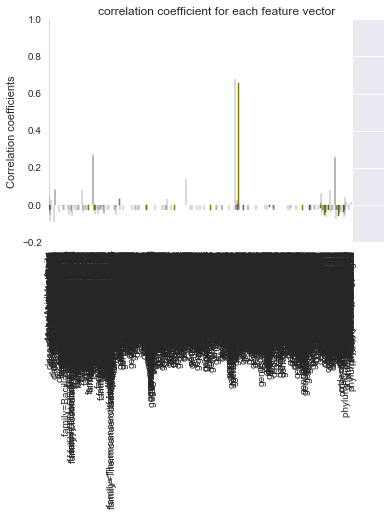

[1.0,
 0.05712255379759805,
 -0.027142703312487231,
 -0.051814815473068342,
 -0.084902856481758493,
 nan,
 nan,
 nan,
 -0.027244216677764683,
 nan,
 0.026510345994575166,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.092416636286092216,
 nan,
 nan,
 nan,
 0.084502315899734545,
 nan,
 0.087133017969123955,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.03880740443904402,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.0024052351073851441,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.027142703312487231,
 nan,
 nan,
 nan,
 nan,
 -0.027610089966615979,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.026377266058169365,
 nan,
 nan,
 -0.05004869648853312,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.037698514516767999,
 nan,
 -0.027348151171924347,
 nan,
 nan,
 -0.055793184905792437,
 nan,
 nan,
 nan,
 nan,
 nan

In [10]:
feature_selection_utils.calculate_features_target_correlation(
    data = extracted_features.head(100),
    features = extracted_features.columns.tolist(),
    target='abundance',
    method="Pearson")

# Find the interaction network among bactria

In [11]:
mappings, nodes_list = dmd.find_fixed_adjacency_matrix(0,'order',False)

all groups of oxygen/week/replicate have abundances that sum to 1
columns after aggregating on phylo level: Index([u'oxygen', u'replicate', u'week', u'kingdom', u'phylum', u'class',
       u'order', u'abundance'],
      dtype='object')
first (up to) 5 phylo columns to 
keep: ['' 'Acidilobales' 'Desulfurococcales' 'Sulfolobales' 'Thermoproteales']
('High', 1)
('High', 2)
('High', 3)
('High', 4)
('Low', 1)
('Low', 2)
('Low', 3)
('Low', 4)
dictionary keys: [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
dataframe_dict.keys(): [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
week                                                      4         5   \
phylo_concat                                                             
Archaea,,,                                          0.000000  0.000018   
Archaea,Crenarchaeota,,                             0.000000  0.000008   
Archaea,Crenarchaeota

# Grpahs Visualization

In [12]:
for key in mappings.keys():
    Adj = mappings[key]
    nodes = nodes_list[key]
#     g = net.create_one_graph(Adj,nodes,edge_treshhold=1e-10)

## Reduce the adjacency matrix: 

Note that "mappings" is called "linear mappings" in the code. 

In [13]:
mappings, nodes_list = dmd.find_fixed_adjacency_matrix(0,'order',False)

all groups of oxygen/week/replicate have abundances that sum to 1
columns after aggregating on phylo level: Index([u'oxygen', u'replicate', u'week', u'kingdom', u'phylum', u'class',
       u'order', u'abundance'],
      dtype='object')
first (up to) 5 phylo columns to 
keep: ['' 'Acidilobales' 'Desulfurococcales' 'Sulfolobales' 'Thermoproteales']
('High', 1)
('High', 2)
('High', 3)
('High', 4)
('Low', 1)
('Low', 2)
('Low', 3)
('Low', 4)
dictionary keys: [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
dataframe_dict.keys(): [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
week                                                      4         5   \
phylo_concat                                                             
Archaea,,,                                          0.000000  0.000018   
Archaea,Crenarchaeota,,                             0.000000  0.000008   
Archaea,Crenarchaeota

number of nodes (rows/columns): 154
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Crenarchaeota,Thermoprotei,', 'Archaea,Crenarchaeota,Thermoprotei,Acidilobales', 'Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales']
number of nodes (rows/columns): 150
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Crenarchaeota,Thermoprotei,Acidilobales', 'Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales', 'Archaea,Crenarchaeota,Thermoprotei,Fervidicoccales']
number of nodes (rows/columns): 155
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Crenarchaeota,Thermoprotei,', 'Archaea,Crenarchaeota,Thermoprotei,Acidilobales', 'Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales']
number of nodes (rows/columns): 151
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Crenarchaeota,Thermoprotei,Acidilobales', 'Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales', 'Archaea,Crenarchaeota,Thermoprotei,Sulfolobales']
number of

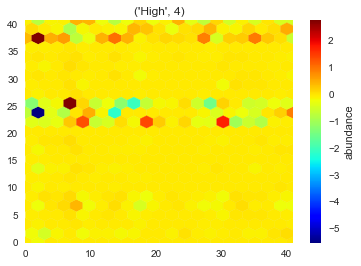

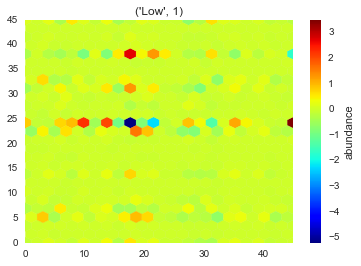

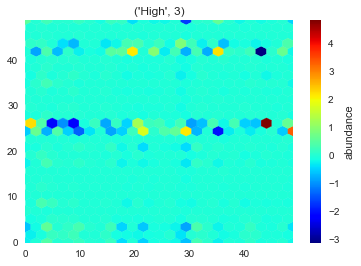

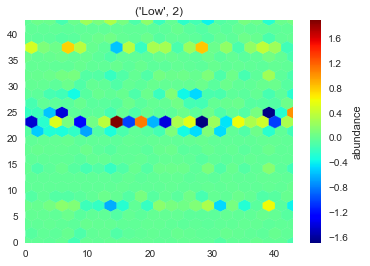

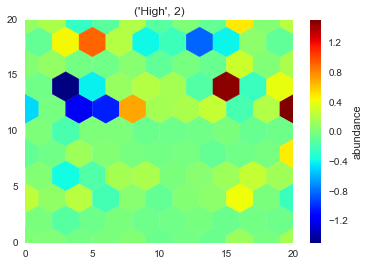

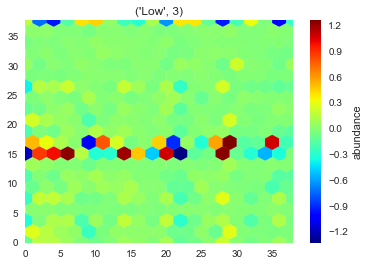

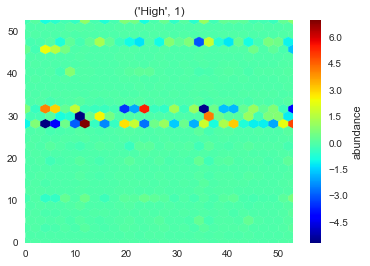

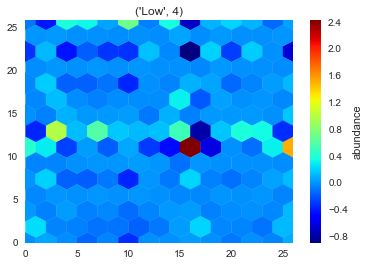

In [14]:
# Generate a reduced adjacency matrix and heatmap for each of the 8 oxygen/replicate series. 
for key in mappings.keys():
    # reduce data
    Adj,nodes=net.reduce_adjacency_matrix(mappings[key],nodes_list[key],edge_threshold=0.5)
    
    # make a heat map: saves to .pdf
    file_name=str(key[0])+str(key[1])+'.pdf'
    net.adjacency_matrix_heatmap(Adj,nodes,str(key),file_name)

# convert DMD results into a Pandas Dataframe

In [16]:
# make, reduce, and plot an adjacency matrix.
mappings, nodes_list = dmd.find_fixed_adjacency_matrix(0.001,'order',False)

all groups of oxygen/week/replicate have abundances that sum to 1
columns after aggregating on phylo level: Index([u'oxygen', u'replicate', u'week', u'kingdom', u'phylum', u'class',
       u'order', u'abundance'],
      dtype='object')
first (up to) 5 phylo columns to 
keep: ['' 'Actinomycetales' 'Bacteroidales' 'Cytophagales' 'Flavobacteriales']
('High', 1)
('High', 2)
('High', 3)
('High', 4)
('Low', 1)
('Low', 2)
('Low', 3)
('Low', 4)
dictionary keys: [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
dataframe_dict.keys(): [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
week                                       4         5         6         7   \
phylo_concat                                                                  
Archaea,,,                           0.000000  0.000018  0.000004  0.000000   
Archaea,Crenarchaeota,,              0.000000  0.000008  0.000000  0.000002   
A

In [17]:
# show one adjacency matrix:
mappings[('Low', 4)]

array([[ -6.77041283e-08,  -1.73368860e-07,  -6.44847931e-10, ...,
          1.04701554e-05,  -5.21868218e-07,   1.30438275e-04],
       [  1.32628017e-07,  -1.97175783e-06,   1.32312970e-07, ...,
         -1.13610368e-05,  -2.53448501e-06,   8.67915865e-04],
       [  3.74837507e-08,  -2.11620894e-07,   6.29254281e-09, ...,
         -2.77865151e-06,  -3.63755820e-07,   4.58575043e-05],
       ..., 
       [  1.14470939e-06,   5.44371856e-06,   3.70239296e-06, ...,
         -1.07935317e-04,   3.17632151e-05,   1.21238325e-02],
       [  6.78768640e-07,  -2.04057818e-06,   2.73192850e-07, ...,
         -3.86485242e-05,  -1.82636428e-06,   1.17645174e-03],
       [  9.65645762e-05,  -2.74118243e-03,   8.57154387e-05, ...,
         -1.17382018e-01,  -3.00552989e-03,   4.82335713e-02]])

In [18]:
# reduce all of the adjacency matrices in a dict.
reduced_array_dict, reduced_node_dict = net.reduce_all_adjacency_matrixes_in_dict(
    mappings, nodes_list, 0.5)

number of nodes (rows/columns): 100
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Crenarchaeota,Thermoprotei,', 'Archaea,Euryarchaeota,,', 'Archaea,Euryarchaeota,Halobacteria,']
number of nodes (rows/columns): 96
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Euryarchaeota,,', 'Archaea,Euryarchaeota,Halobacteria,', 'Archaea,Euryarchaeota,Halobacteria,Halobacteriales']
number of nodes (rows/columns): 100
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Crenarchaeota,Thermoprotei,', 'Archaea,Euryarchaeota,,', 'Archaea,Euryarchaeota,Halobacteria,']
number of nodes (rows/columns): 97
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Euryarchaeota,,', 'Archaea,Euryarchaeota,Halobacteria,', 'Archaea,Euryarchaeota,Halobacteria,Halobacteriales']
number of nodes (rows/columns): 98
first few nodes: ['Archaea,,,', 'Archaea,Crenarchaeota,,', 'Archaea,Crenarchaeota,Thermoprotei,', 'Archaea,Euryarchaeota,,', 'Archaea,Eur

In [19]:
dict_of_pandas = \
    dmd.DMD_results_dict_from_numpy_to_pandas(reduced_array_dict,
                                              reduced_node_dict)

('High', 4)
('Low', 1)
('High', 3)
('Low', 2)
('High', 2)
('Low', 3)
('High', 1)
('Low', 4)


## Seaborn Heatmap Demo

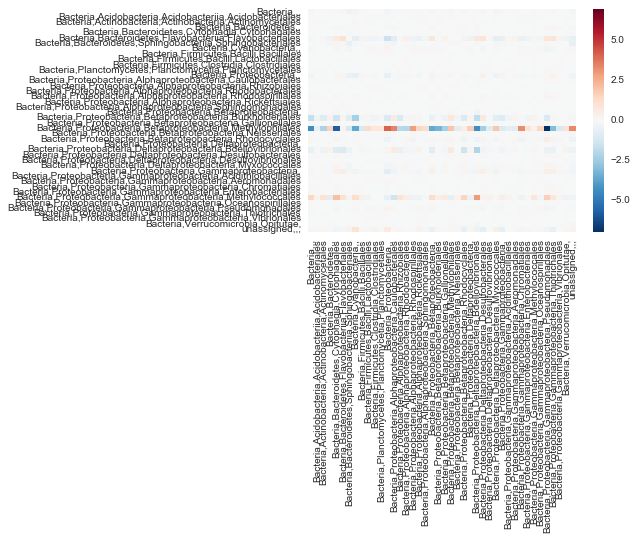

In [20]:
hmp = sns.heatmap(dict_of_pandas[('Low', 2)])

In [21]:
hmp.figure.set_figwidth(10)
hmp.figure.set_figheight(10)

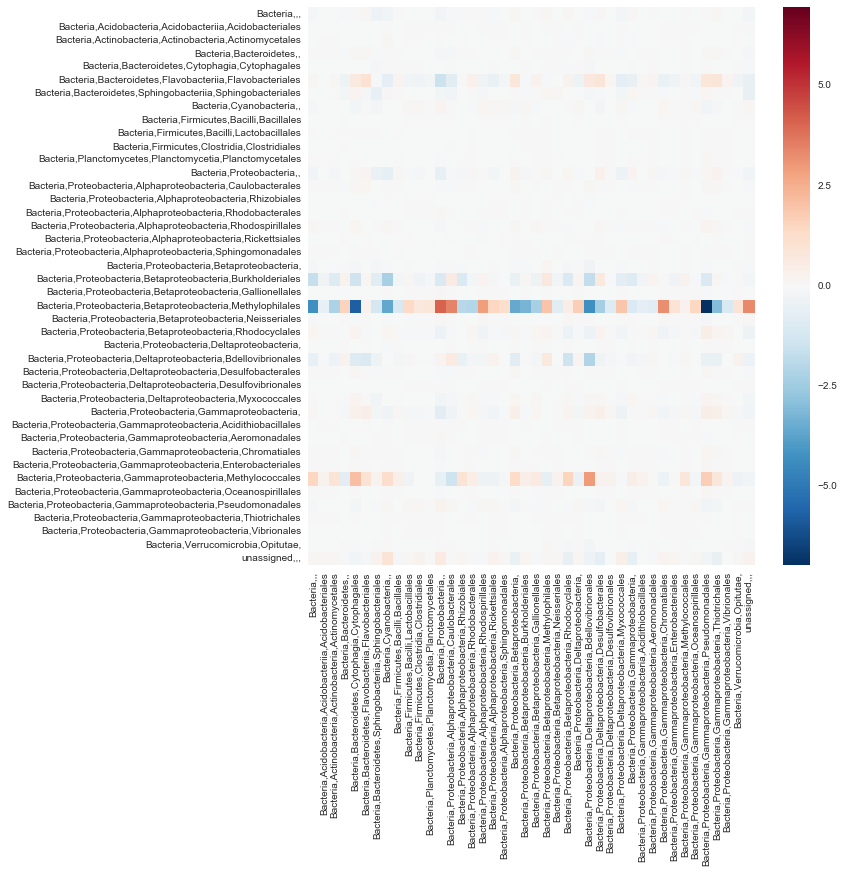

In [23]:
hmp.figure

In [22]:
hmp.figure
hmp.figure.savefig("sample_heatmap_result.pdf")

TODO: saved fig has cut off labels.  Need to look it up. 